# Primera Red con datos reales 
Esta red intenta predecir la potencia de una señal de la clase llamada HTLOS el archivo de potencia tomado es:potencia 2000-01-03 21_3A11_3A34 Antenna Horn Time 300[s] SwitchingBy 0 Horn 0 Omni 0 ING-AU_033


In [0]:
#A continuación se importan laas librerias necesarias para el entrenamiento de la red 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
#lectura de los datos de la primera señal
dataframe = pd.read_csv('/content/drive/My Drive/Mediciones en csv/HTLOS CSV/potencia 2000-01-03 21_3A11_3A34 Antenna Horn Time 300[s] SwitchingBy 0 Horn 0 Omni 0 ING-AU_033.csv', header= None)

In [0]:
#llevar al dataframe a un arreglo de valores
dataset = dataframe.values

In [122]:
#dataset
POT = dataset[0:len(dataset),1]
print(POT.shape)

(210108,)


Ploteo de los datos de potencia

Text(0.5, 1.0, 'Datos reales')

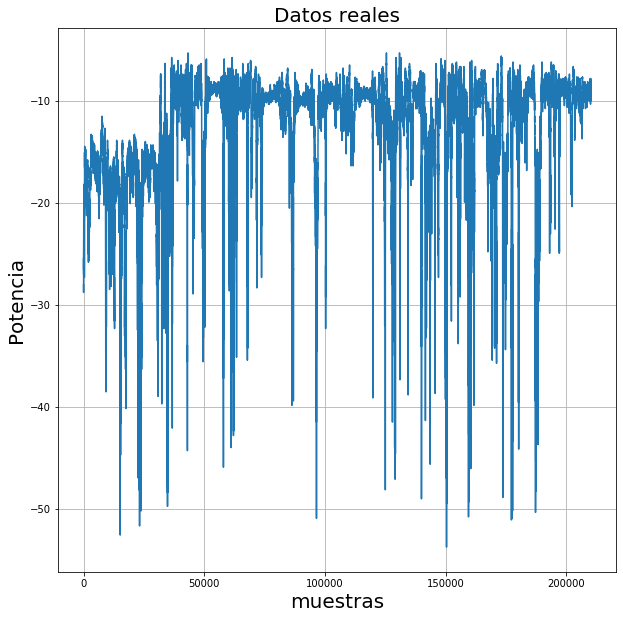

In [123]:
plt.figure(figsize=[10,10])
plt.grid()
plt.plot(POT)
plt.xlabel("muestras",fontsize = 20)
plt.ylabel("Potencia",fontsize = 20)
plt.title("Datos reales", fontsize = 20)

In [124]:
#llevo la funcion a un arreglo de [lARGO DEL ARREGLO ,1] PARA ESCALAR LOS DATOS y que la red aprenda de mejor forma
POT2=POT.reshape(len(POT),1)
print(POT2.shape)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
POT2 = scaler.fit_transform(POT2)

(210108, 1)


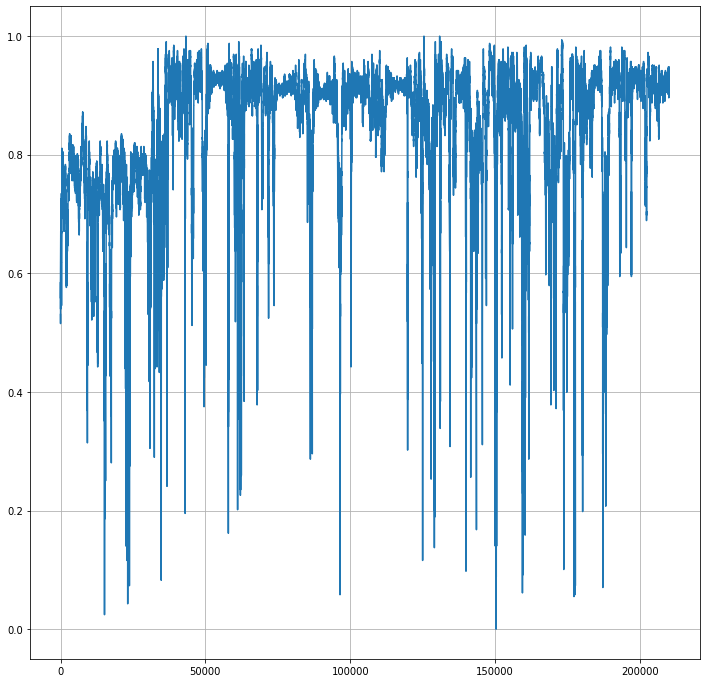

In [125]:
plt.figure(figsize=[12,12])
plt.grid()
plt.plot(POT2)

In [126]:
# divido la funcion POT en arreglos para entrenar la red de un largo del 80% y probar la red con el restante 20%
train_size = int(len(POT2) * 0.8)
test_size = len(POT2) - train_size
train, test = POT2[0:train_size,:], POT2[train_size:len(POT2),:]
print(len(train), len(test))
#print(train.shape)
#print(test.shape)

168086 42022


In [0]:
# convertir un arreglo de valores en una matrix
def create_dataset(POT2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(POT2)-look_back-1):
        a = POT2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(POT2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

Mediate el look_back se guardan los datos del tiempo siguiente y que la red intentara predecir 

TrainX = corresponde a los datos del "pasado" que corresponde al tiempo en el instante t.

TrainY = Son los datos de valores que se quieren predecir del tiempo t+1 y que la red utiliza para aprender el comportamiento de los datos  

testX y testY son valores que la red no ve, y que se utilizará para probar lo aprendido por la red 

In [144]:
# reshape dentro X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
print(trainX[0])
print(trainY[0])
print(trainX[1])
print(trainY[1])
print(trainX[2])
print(trainY[3])

(168080, 5)
(42016, 5)
(168080,)
(42016,)
[0.53056588 0.5243701  0.53655514 0.53056588 0.53965304]
0.5456422965716645
[0.5243701  0.53655514 0.53056588 0.53965304 0.5456423 ]
0.530565881866997
[0.53655514 0.53056588 0.53965304 0.5456423  0.53056588]
0.5243700950020652


In [145]:
# reshape a la entrada [samples, time steps, features] que es necesario para la red lstm
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(168080, 1, 5)
(42016, 1, 5)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               42400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


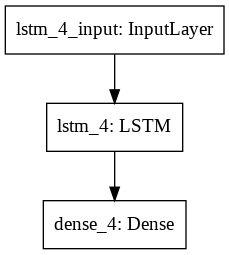

In [146]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100,input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
model.summary()
keras.utils.plot_model(model, 'my_first_model.png')

In [147]:
History = model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
168080/168080 [==============================] - 16s 96us/step - loss: 0.0044 - mean_squared_error: 0.0044 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 2111.2507
Epoch 2/50
168080/168080 [==============================] - 15s 92us/step - loss: 1.9415e-04 - mean_squared_error: 1.9415e-04 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 1903.0188
Epoch 3/50
168080/168080 [==============================] - 16s 94us/step - loss: 1.3026e-04 - mean_squared_error: 1.3026e-04 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 1648.2865
Epoch 4/50
168080/168080 [==============================] - 15s 90us/step - loss: 1.1217e-04 - mean_squared_error: 1.1217e-04 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 1234.3395
Epoch 5/50
168080/168080 [==============================] - 16s 92us/step - loss: 1.0494e-04 - mean_squared_error: 1.0494e-04 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 1160.0768
Epoch 6/

In [148]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))

Train Score: 0.44 RMSE
Test Score: 0.49 RMSE
Train Mean Absolute Error: 0.20474154256866528
Train Root Mean Squared Error: 0.4444598667405935
Test Mean Absolute Error: 0.22812241394512547
Test Root Mean Squared Error: 0.4937119873361689


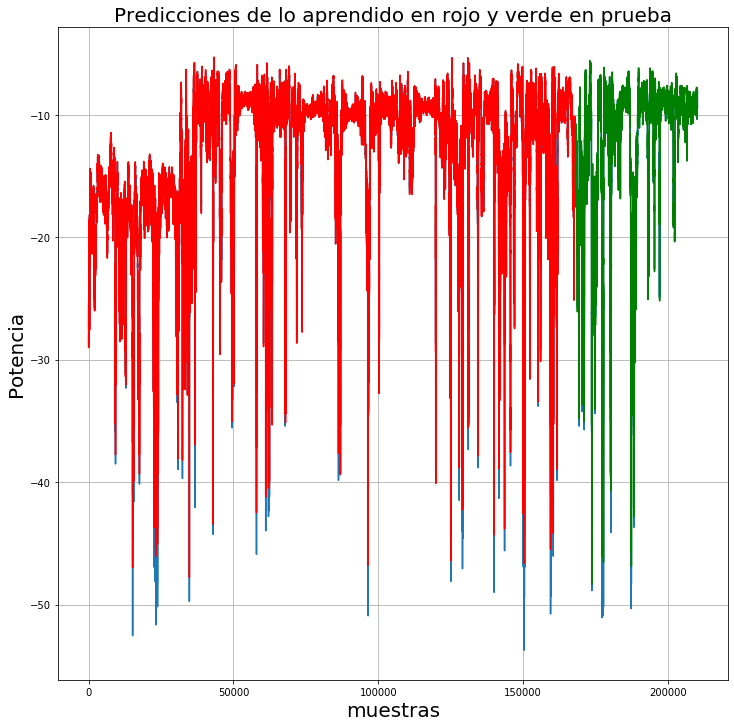

In [149]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(POT2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(POT2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(POT2)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[12,12])
plt.plot((POT))
plt.plot(trainPredictPlot, color="red", )
plt.xlabel("muestras",fontsize = 20)
plt.ylabel("Potencia",fontsize = 20)
plt.plot(testPredictPlot, color="green")
plt.title("Predicciones de lo aprendido en rojo y verde en prueba", fontsize = 20)
plt.grid()
plt.show()

Luego se muestran los errores de la red

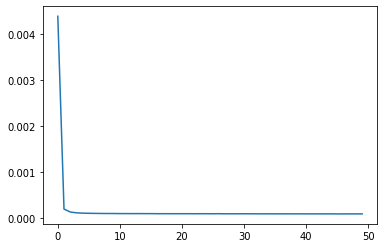

In [150]:
# plot metrics
plt.plot(History.history['mean_squared_error'])

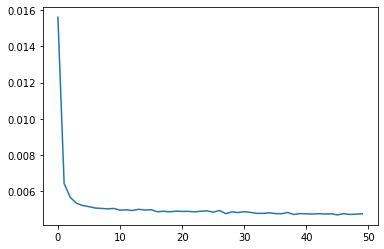

In [151]:
plt.plot(History.history['mean_absolute_error'])

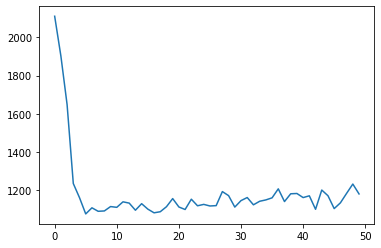

In [152]:
plt.plot(History.history['mean_absolute_percentage_error'])

In [154]:

DATOS_PRED=testPredict[:,0]
DATOS_PRED

array([-14.033396, -13.988465, -14.76291 , ...,  -8.21316 ,  -8.07901 ,
        -8.119178], dtype=float32)

In [0]:
test_real = scaler.inverse_transform(test)

In [0]:
DATOS_REAL= test_real[4:42020,0]

In [0]:
acc = abs(DATOS_PRED-DATOS_REAL)

Tabla con los Valores Predichos, relaes, el error entre ambas y error % de los datos


El error porcentual = abs(predicciones-datos_reales)/datos_reales *100

In [159]:
porc_error = (acc / abs(DATOS_REAL)) * 100
porc_error

array([0.96403834, 0.22492647, 1.04661115, ..., 0.68730881, 0.50480284,
       0.01012539])

In [160]:
mostrar = DATOS_PRED, DATOS_REAL, acc, acc*100,porc_error
mostrar = np.array(mostrar)
Tabla_arr = np.array(mostrar)
Tabla = np.transpose(Tabla_arr)
Tabla_df = pd.DataFrame(Tabla, columns=['Datos predichos','Datos reales','Error','Error x100','Error porcentual'])
Tabla_df

,Datos predichos,Datos reales,Error,Error %,Error porcentual
0,-14.033396,-14.17,0.136604,13.660423,0.964038
1,-13.988465,-14.02,0.031535,3.153469,0.224926
2,-14.762910,-14.61,0.152910,15.290989,1.046611
3,-14.872499,-14.91,0.037501,3.750053,0.251513
4,-14.850854,-14.91,0.059146,5.914608,0.396687
...,...,...,...,...,...
42011,-8.419449,-8.41,0.009449,0.944885,0.112353
42012,-8.387599,-8.41,0.022401,2.240101,0.266362
42013,-8.213160,-8.27,0.056840,5.684044,0.687309
42014,-8.079010,-8.12,0.040990,4.098999,0.504803
